# 머신러닝
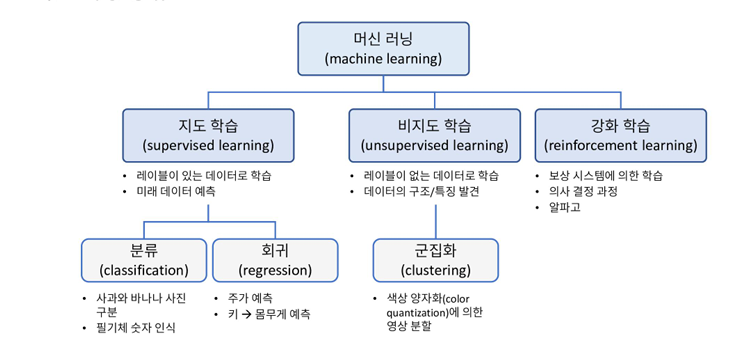

## openCV 머신 러닝 클래스
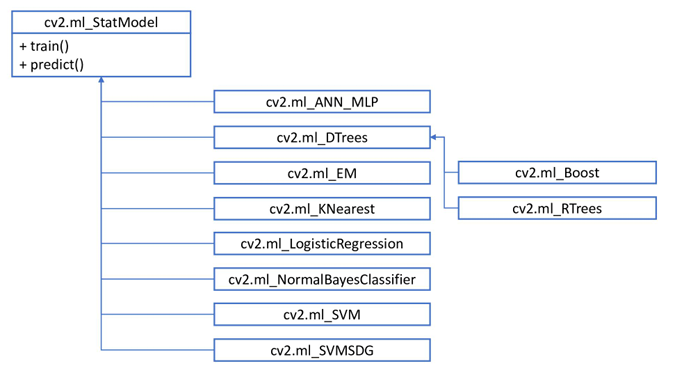
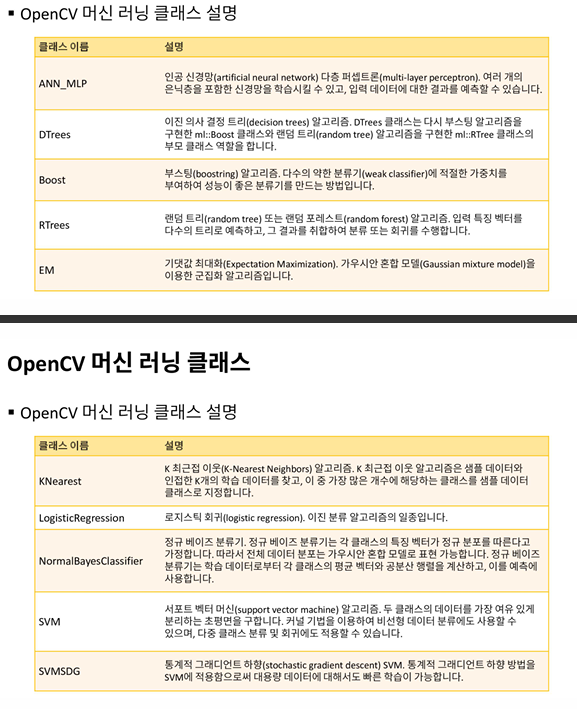

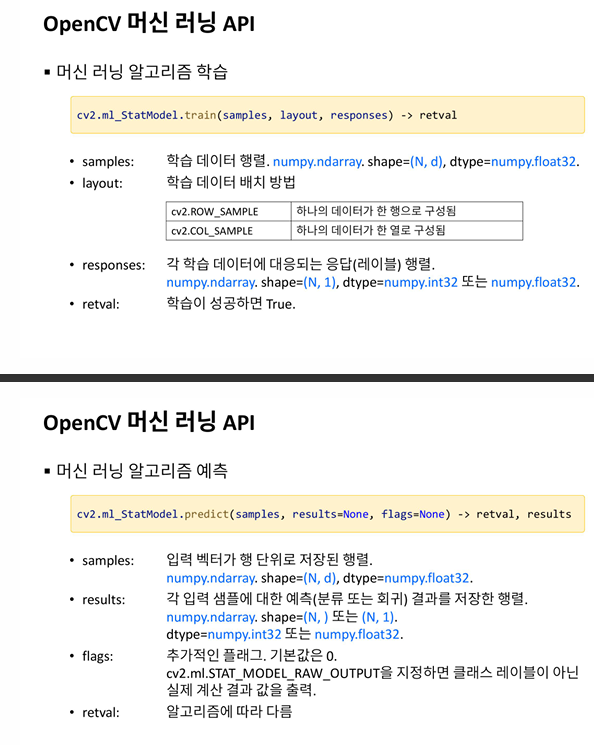

## K 최근접 이웃 알고리즘
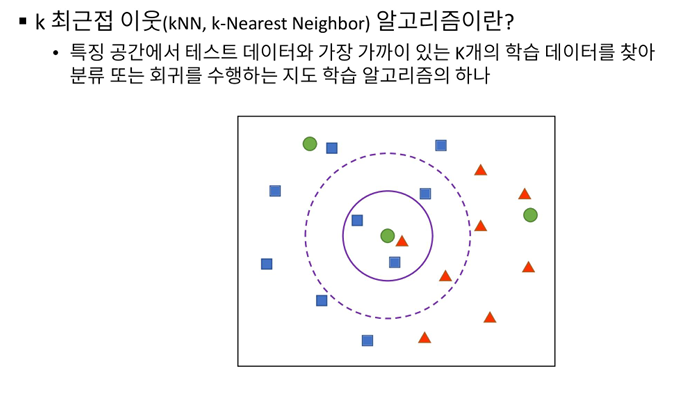
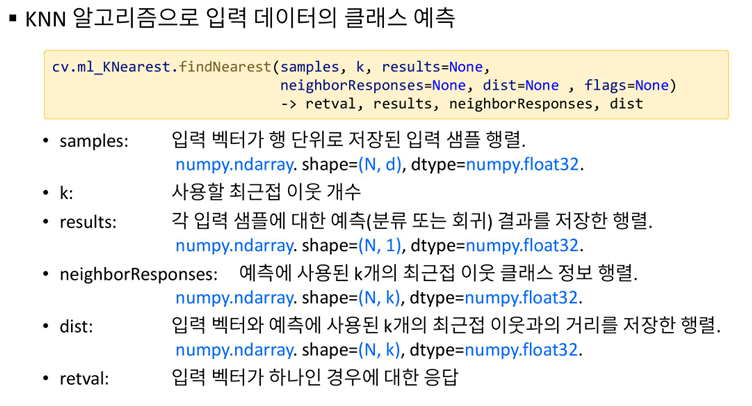

In [ ]:
import numpy as np
import cv2


def on_k_changed(pos):  # 트랙바 설치 트랙바에대한 콜백함수
    global k_value

    k_value = pos
    if k_value < 1:
        k_value = 1

    trainAndDisplay()


def addPoint(x, y, c):
    train.append([x, y])
    label.append([c])


def trainAndDisplay():
    """## 주석 지우고 보여줌"""
    trainData = np.array(train, dtype=np.float32)
    labelData = np.array(label, dtype=np.int32)

    knn.train(trainData, cv2.ml.ROW_SAMPLE, labelData)

    ####### 여기서부터 디스플레이를 위해 작성한 함수
    h, w = img.shape[:2]
    for y in range(h):
        for x in range(w):
            sample = np.array([[x, y]]).astype(np.float32)

            ret, _, _, _ = knn.findNearest(sample, k_value)

            ret = int(ret)
            if ret == 0:
                img[y, x] = (128, 128, 255)
            elif ret == 1:
                img[y, x] = (128, 255, 128)
            elif ret == 2:
                img[y, x] = (255, 128, 128)

    for i in range(len(train)):
        x, y = train[i]
        l = label[i][0]

        if l == 0:
            cv2.circle(img, (x, y), 5, (0, 0, 128), -1, cv2.LINE_AA)
        elif l == 1:
            cv2.circle(img, (x, y), 5, (0, 128, 0), -1, cv2.LINE_AA)
        elif l == 2:
            cv2.circle(img, (x, y), 5, (128, 0, 0), -1, cv2.LINE_AA)

    cv2.imshow("knn", img)


###### 2차원 평면상에 점을 찍고 점들을 3개의 클래스로 구분하는 프로그램
# 학습 데이터 & 레이블
train = []  ###### 2차원 좌표 여러개 집어넣을거임(90개)
label = []  ###### 90개의 데이터에 대한 레이블

k_value = 1
img = np.full((500, 500, 3), 255, np.uint8)  # 500x500 모두 흰색(255)
knn = cv2.ml.KNearest_create()  # k-NN 생성

# 랜덤 데이터 생성
NUM = 30
rn = np.zeros(
    (NUM, 2), np.int32
)  ##########30행 2열  60개의 Element에 대한 랜덤넘버 제네레이션

# (150, 150) 근방의 점은 0번 클래스로 설정
cv2.randn(rn, 0, 50)  ########### 가우시안 형태 넘버를 생성해주는 함수
for i in range(NUM):
    addPoint(
        rn[i, 0] + 150, rn[i, 1] + 150, 0
    )  ######### (x,y, 이점의 클래스)  (150, 150 ) +50 근방에 생성 라벨은 0

# (350, 150) 근방의 점은 1번 클래스로 설정  라벨 1번
cv2.randn(rn, 0, 50)
for i in range(NUM):
    addPoint(rn[i, 0] + 350, rn[i, 1] + 150, 1)

# (250, 400) 근방의 점은 2번 클래스로 설정
cv2.randn(rn, 0, 70)
for i in range(NUM):
    addPoint(rn[i, 0] + 250, rn[i, 1] + 400, 2)

# 영상 출력 창 생성 & 트랙바 생성
cv2.namedWindow("knn")
cv2.createTrackbar("k_value", "knn", 1, 5, on_k_changed)

# KNN 결과 출력
trainAndDisplay()

cv2.waitKey()
cv2.destroyAllWindows()

## KNN 필기체 숫자 인식

In [19]:
import sys
import numpy as np
import cv2


oldx, oldy = -1, -1


def on_mouse(event, x, y, flags, _):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        oldx, oldy = -1, -1

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), 40, cv2.LINE_AA)
            oldx, oldy = x, y
            cv2.imshow("img", img)


# 학습 & 레이블 행렬 생성

digits = cv2.imread("images/digits.png", cv2.IMREAD_GRAYSCALE)

if digits is None:
    print("Image load failed!")
    sys.exit()

h, w = digits.shape[:2]

cells = [np.hsplit(row, w // 20) for row in np.vsplit(digits, h // 20)]
cells = np.array(cells)
print("cells shape: ", cells.shape)
train_images = cells.reshape(-1, 400).astype(np.float32)
print("trains_images.shpae:", train_images.shape)
train_labels = np.repeat(np.arange(10), len(train_images) / 10)
print("train_labels", train_labels)
print("tain_labels.shape", train_labels.shape)
# KNN 학습

knn = cv2.ml.KNearest_create()
knn.train(train_images, cv2.ml.ROW_SAMPLE, train_labels)

# 사용자 입력 영상에 대해 예측

img = np.zeros((400, 400), np.uint8)

cv2.imshow("img", img)
cv2.setMouseCallback("img", on_mouse)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord(" "):
        test_image = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)
        test_image = test_image.reshape(-1, 400).astype(np.float32)

        ret, _, _, _ = knn.findNearest(test_image, 5)
        print(int(ret))

        img.fill(0)
        cv2.imshow("img", img)

cv2.destroyAllWindows()

cells shape:  (50, 100, 20, 20)
trains_images.shpae: (5000, 400)
train_labels [0 0 0 ... 9 9 9]
tain_labels.shape (5000,)
